<a href="https://colab.research.google.com/github/AleemRahil/Robust-End-to-End-E-Commerce-Analytics-Automation-with-LLMs/blob/main/shopify_openai_assistant_functioncalls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Shopify API Calls With OpenAI Assistant Functions

In this project, I am going to delve into the functionality of OpenAI assistants and how they can be leveraged for extracting data. We will carry out an explicit exercise to extract Shopify data using function calling.

GPT technology can transform the way developers work, making it possible to write code and develop features much faster than before. This is, of course, also true for ecommerce specifically. With the power of GPTs, we can now build advanced chatbots and interfaces for the Shopify platform more quickly and efficiently than ever.

In this tutorial, we will look at the functionality of OpenAI assistants and how they can be leveraged to build chatbots that interact with Shopify data. I will use the function calling capabilities of the OpenAI Assistant API and walk you through the run-step process that executes a function that extracts the needed Shopify data. Specifically, we are going to cover

*   OpenAI Assistant Use Cases
*   How OpenAI Assistants Work
*   How to Extract Shopify Data with Assistant Function Calling
*   Decoding OpenAI Assistant Run Steps

#OpenAI Assistant Use Cases


OpenAI Assistants can transform various business functions, including customer support, ecommerce, marketing, and data analysis. Leveraging OpenAI Assistants and Agentic systems can bring several benefits, such as automating administrative tasks, saving time, and minimizing human error. They can analyze large datasets, generate reports, and highlight key findings, optimizing various business functions.

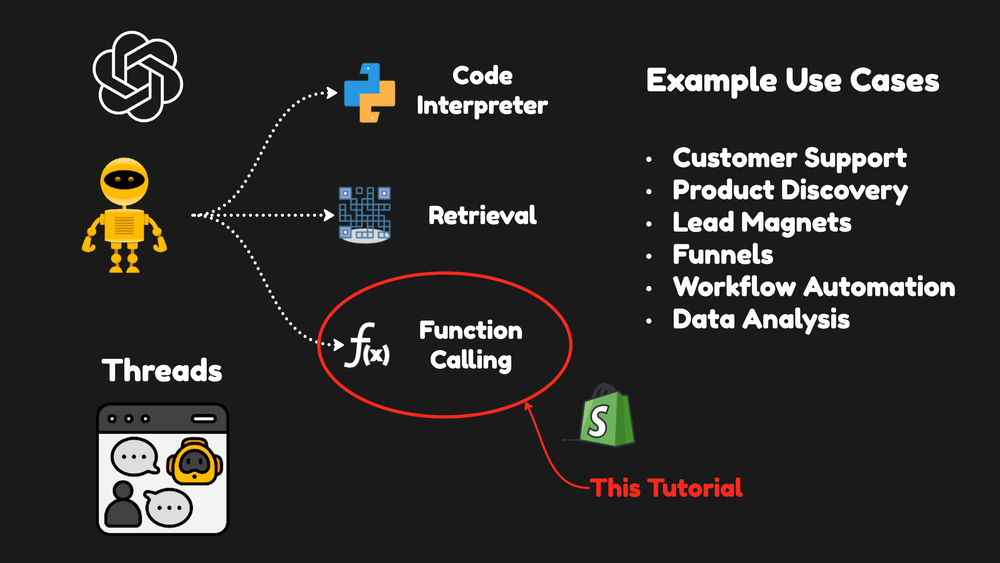

Here are some practical applications:

1. Customer Support
By handling simple inquiries, OpenAI Assistants can reduce wait times for customers seeking help or information. Immediate engagement can lead to improved customer satisfaction and loyalty. For businesses, it means their human employees can focus on more complex queries, optimizing the overall efficiency of the support team.

2. Product Discovery
OpenAI Assistants can act as personal shopping assistants, asking users questions about their preferences and using those responses to recommend products that meet their needs. This personalization enhances the shopping experience and can lead to increased sales.

3. Lead Magnets
OpenAI Assistants can engage website visitors through interactive conversations, quizzes, or questionnaires, making the data collection process more engaging and less intrusive. This information can create more personalized and targeted marketing campaigns, improving conversion rates and building a more refined customer profile.

4. Funnels
In marketing and sales, guiding a potential customer through the various stages of the buying process is key to healthy conversion rates. OpenAI Assistants can qualify leads by asking questions and providing information or resources relevant to each stage of the funnel. This process helps nurture leads more effectively and move them closer to making a purchase.

5. Workflow Automation
Administrative tasks and repetitive processes can consume a significant amount of time for businesses. OpenAI Assistants can automate these tasks, such as scheduling appointments, updating records, or retrieving specific information, freeing employees to focus on more strategic activities.

6. Data Analysis
OpenAI Assistants can assist in analyzing data, generating reports, and highlighting key findings. This capability enables businesses to make informed decisions more quickly and efficiently, leveraging the power of their data to drive growth and profitability.

#How OpenAI Assistants Work
OpenAI Assistants work by engaging with users through threads. They can be programmed with specific instructions to fine-tune their personality and abilities, making them versatile for various tasks. These tasks could range from interpreting code to retrieving knowledge, all facilitated by OpenAI's hosted tools or custom tools you can create and host yourself.

Threads are persistent and store the history of messages, allowing for continuous conversations. Once a Thread is created, it's simply a matter of appending new messages as users interact with the assistant.

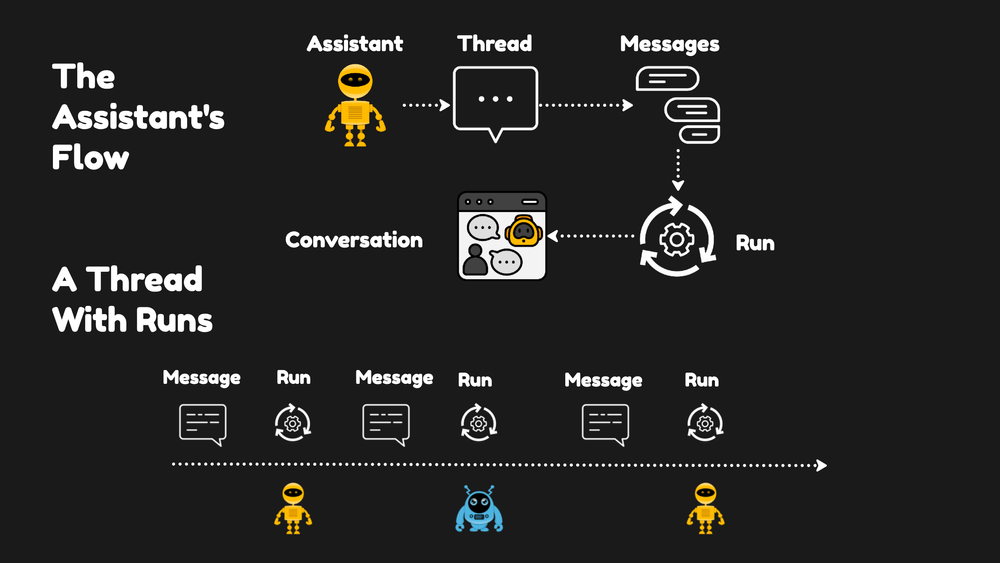

OpenAI Assistants can work with files introduced at the creation stage or during ongoing conversations within Threads. Additionally, when utilizing specific tools, assistants can create new files, such as images or spreadsheets.

Let's get our hands dirty and see how we set up an assistant capable of doing basic function calling to help a customer with an order inquiry.

#Environment Setup


In [ ]:
!pip install -qU \
  python-dotenv \
  openai \
  ShopifyAPI

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.4/227.4 kB 9.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.0 MB/s eta 0:00:00


In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [ ]:
from openai import OpenAI
client = OpenAI()

#Connecting to Shopify


In [ ]:
import shopify, time, json

def shopify_client(merchant, token):
    """
    Initialize a Shopify GraphQL client.
    """
    api_session = shopify.Session(merchant, '2023-10', token)
    shopify.ShopifyResource.activate_session(api_session)
    client = shopify.GraphQL()
    return client

def query_customer_by_email(customer_email):
    """
    Query customer data by email from Shopify.
    """
    # 'your_shopify_store.myshopify.com'
    merchant = os.getenv('SHOPIFY_MERCHANT')
    # 'your_shopify_access_token'
    token = os.getenv('SHOPIFY_TOKEN')
    # Initialize the Shopify GraphQL client
    client = shopify_client(merchant, token)

    query = f"""
    {{
      customers(first: 1, query: "email:'{customer_email}'") {{
        edges {{
          node {{
            id
            firstName
            lastName
            email
            orders(first: 3) {{
              edges {{
                node {{
                  id
                  createdAt
                  currentSubtotalLineItemsQuantity
                  lineItems(first: 5) {{
                    edges {{
                      node {{
                        id
                        title
                        variantTitle
                        quantity
                      }}
                    }}
                  }}
                }}
              }}
            }}
          }}
        }}
      }}
    }}
    """

    # Execute the query
    result = client.execute(query)

    # Process the result as needed
    return result

Here, I define the two functions needed for extracting the data: shopify_client, which sets up a connection to Shopify using a merchant's URL and API token, and query_customer_by_email, which queries Shopify for customer data based on their email address. By calling query_customer_by_email with a customer's email, we retrieve detailed customer and order information.



In [ ]:
query_customer_by_email('john@rabbitpromotion.com')

'{"data":{"customers":{"edges":[{"node":{"id":"gid://shopify/Customer/7067418001576","firstName":"John","lastName":"Doe","email":"john@rabbitpromotion.com","orders":{"edges":[{"node":{"id":"gid://shopify/Order/5449412444328","createdAt":"2024-01-02T13:55:18Z","currentSubtotalLineItemsQuantity":1,"lineItems":{"edges":[{"node":{"id":"gid://shopify/LineItem/12988160770216","title":"ADIDAS | CLASSIC BACKPACK | LEGEND INK MULTICOLOUR","variantTitle":"OS / blue","quantity":1}}]}}}]}}}]}},"extensions":{"cost":{"requestedQueryCost":17,"actualQueryCost":9,"throttleStatus":{"maximumAvailable":2000.0,"currentlyAvailable":1991,"restoreRate":100.0}}}}'

#Setting Up The Shopify Assistant

We will now see how the OpenAI Assistant function calls work and connect an assistant to the Shopify API to fetch some data. To connect the assistant to Shopify, we need to specify the tools the assistant will have at its disposal. In this case, it's only one function, which is integrated into our assistant's capabilities to allow it to fetch information about a customer's orders. This function is defined within the list tools, and it outlines the specific external function query_customer_by_email that our assistant can call upon when needed:

In [ ]:
# First we define the tools for the assistant
tools=[
    {
        "type": "function",
        "function": {
            "name": "query_customer_by_email",
            "description": "Get the orders for a customer given a customer email",
            "parameters": {
                "type": "object",
                "properties": {
                    "email": {"type": "string", "description": "The email of the customer"}
                },
                "required": ["email"]
            }
        }
    }
]

This configuration not only specifies the function's name but also describes its purpose: to retrieve orders for a customer using their email address. It details the parameters required for the function to execute, in this case, the customer's email address, and marks it as a required field.

This assistant is designed to function as a sales chatbot, offering help to customers by answering questions about their orders and, if necessary, asking for additional information:

In [ ]:
# The we define the assistant
prompt="""You are an e-commerce sales chatbot helping customers
        answer questions about their orders. If needed, ask for
        additional information from the customer"""

assistant = client.beta.assistants.create(
  instructions=prompt,
  model="gpt-4-0125-preview",
  name="Ecom Customer Support Assistant",
  tools=tools,
)

Here, I'm using the client.beta.assistants.create method to set up an ecommerce assistant. I provide it with a set of instructions that outlines its role as a support entity within an e-commerce environment. The assistant uses the gpt-4-0125-preview model, and the name parameter identifies our assistant as the "Ecom Customer Support Assistant," clarifying its purpose.

Most importantly, we integrate the previously defined tools array into our assistant's setup. This array includes the query_customer_by_email function, which allows the assistant to fetch order details directly from Shopify based on customer email addresses. This integration signifies a crucial step towards creating a dynamic and interactive assistant capable of handling specific customer inquiries by accessing real-time data from external systems.

#Running The Assistant
Then, we add the customer's message to the conversation thread and execute the assistant's response mechanism. This involves creating a new thread for the dialogue, posting a message as if it were from a customer, and initiating a run where the assistant processes the message. Here's how this is done:

In [ ]:
# Create a new thread

thread = client.beta.threads.create()
print(thread.id)

Here, we first create a new thread for the dialogue. Then, we simulate a customer's inquiry about their orders by posting a message to this thread. Lastly, by initiating a run, we prompt the assistant to process the message and prepare a response. This sequence effectively sets up the interaction, leveraging the assistant's capabilities to provide meaningful support to the customer.



#Displaying Conversations
To display the messages resulting from the run step, we use a specific function designed to organize and print the conversation for easy reading. This function, print_conversationtakes the messages object, sorts the messages by their creation time, and prints each one with a timestamp, the role of the sender (Assistant or User), and the message text:

In [ ]:
# Add a message to the thread

message = client.beta.threads.messages.create(
  thread_id=thread.id,
  role="user",
  content="I'm looking to get an overview of my orders"
)



In [ ]:
# Run the thread

run = client.beta.threads.runs.create(
  thread_id=thread.id,
  assistant_id=assistant.id,
)

In [ ]:
# Function that will display the conversation in a readable format

from datetime import datetime

def print_conversation(messages_object):
    # Sort messages by their creation time
    sorted_messages = sorted(messages_object.data, key=lambda x: x.created_at)

    # Iterate through the sorted messages and print them
    for msg in sorted_messages:
        # Convert timestamp to readable format
        timestamp = datetime.utcfromtimestamp(msg.created_at).strftime('%Y-%m-%d %H:%M:%S')
        role = "Assistant" if msg.role == 'assistant' else "User"
        text = msg.content[0].text.value if msg.content else "No text content"
        print(f"{timestamp} [{role}]: {text}")

This function enhances the readability of the conversation by clearly distinguishing between user and assistant messages, providing a structured overview of the interaction timeline. It's a useful tool for debugging and presentation, allowing developers and users alike to follow the dialogue's flow easily.

Retrieving the results from the run provides a straightforward example of the interaction between the user and the assistant, illustrating how the assistant handles queries and requests for additional information to provide specific assistance. Here is the exact conversation:

2024-02-13 16:08:03 [User]: "I'm looking to get an overview of my orders"

2024-02-13 16:09:42 [Assistant]: "Sure, I can help with that. Could you please provide me with your email address? This will allow me to look up your order history."

This dialogue showcases the assistant's ability to understand the user's request and its protocol for gathering the necessary information to fulfill that request. By asking for the user's email address, the assistant demonstrates a logical step toward accessing personalized order details, emphasizing its role in facilitating a user-friendly and efficient support experience.

In [ ]:
# Check the status of the run

run = client.beta.threads.runs.retrieve(
  thread_id=thread.id,
  run_id=run.id
)

In [ ]:
# Display messages from the thread

messages = client.beta.threads.messages.list(
  thread_id=thread.id
)

print_conversation(messages)

#Executing The Run Steps


To retrieve order details for a customer named John Doe from my Shopify account, I input his email into the assistant with the following command:



In [ ]:
# Give the email adress to the assistant

message = client.beta.threads.messages.create(
  thread_id=thread.id,
  role="user",
  content="my email address is <some_email_adress> "
)

This step is necessary to look up John Doe's order information using the assistant.

After waiting a bit, the status of the run changes to "requires_action." This status indicates that the assistant needs additional action to proceed, typically meaning it's ready to use the arguments provided by the user to execute a function. To check the run status and confirm it's in this state, you can retrieve the run details and examine the status like this:

When the status is "requires_action," it signals that we can move forward with extracting the arguments provided by the user—in this case, John Doe's email address—and then execute the query_customer_by_email function to fetch the relevant data from Shopify on behalf of the Assistant.

To extract the arguments from the run when it reaches the "requires_action" status, you can access the necessary information by navigating through its required_action attribute. This allows you to identify the specific tool call (in this case, our function call to query_customer_by_email) and then extract the customer's email address from the arguments:

In [ ]:
# When run_status is 'requires_action' extract the function argument - in this case an email
tool_call = run.required_action.submit_tool_outputs.tool_calls[0]
customer_email = json.loads(tool_call.function.arguments)['email']

This navigates to the first tool call within the required_action of the run. It then parses the arguments of the function call, which are in JSON format, to extract the email field. This field contains the email address provided by the user, which, in our scenario, is John Doe's email "john@rabbitpromotion.com". With the email address successfully extracted, you're set to execute the function with this argument to retrieve John Doe's order details from Shopify.

The final step involves using the extracted customer email to fetch their information from Shopify and then submitting this information back to the assistant as tool outputs:

In [ ]:
# The execute the fuction on behalf of the assistant and return the output back to the assistant

customer_info = query_customer_by_email(customer_email)
tool_outputs = []
tool_outputs.append(
      {
            "tool_call_id": tool_call.id,
            "output": customer_info,
      })
run = client.beta.threads.runs.submit_tool_outputs(
    thread_id=thread.id,
    run_id=run.id,
    tool_outputs=tool_outputs
)

This will fetch the customer's order information using the query_customer_by_email function with the extracted email. It then prepares a list of tool outputs, including the tool_call_id and the fetched customer_info, and submits these outputs to the assistant. This action allows the assistant to use the provided information in its conversation with the user.

Once the run is complete and the tool outputs are submitted, we can retrieve and display the conversation's messages:

In [ ]:
# The assistant can now incorporate the function output into the conversation

messages = client.beta.threads.messages.list(
  thread_id=thread.id
)

print_conversation(messages)

This results in a conversation that flows as follows:

2024-02-13 16:08:03 [User]: "I'm looking to get an overview of my orders"

2024-02-13 16:09:42 [Assistant]: "Sure, I can help with that. Could you please provide me with your email address? This will allow me to look up your order history."

2024-02-13 16:10:59 [User]: "my email address is john@rabbitpromotion.com"

2024-02-13 16:14:30 [Assistant]: "It looks like you have one order in your history with us. Here are the details of your order:
Order ID: 5449412444328
Order Date: January 2, 2024
Items Ordered:
Product: ADIDAS | CLASSIC BACKPACK | LEGEND INK MULTICOLOUR
Variant: OS / blue
Quantity: 1"

This exchange effectively demonstrates how the assistant can fetch specific customer data from Shopify and convey this information to the user, providing a tailored and informative response based on the user's request.